# 1. 대통령 연설문 텍스트 마이닝

In [1]:
# open()으로 파일을 열고 read()를 이용해 불러오기
moon = open('Data/speech_moon.txt', encoding = 'UTF-8').read()
#moon

## 불필요한 문자 제거

In [2]:
# [^가-힣]은 한글이 아닌 모든 문자를 의미하는 정규 표현식
# 문자 처리 패키지인 re의 sub()를 이용해 한글이 아닌 모든 문자를 공백으로 치환
import re
moon = re.sub('[^가-힣]', ' ', moon)
#moon

## 명사 추출하기

In [3]:
# hannanum(한나눔) 만들기
import konlpy
hannanum = konlpy.tag.Hannanum()
hannanum.nouns("대한민국의 영토는 한반도와 그 부속도서로 한다")

['대한민국', '영토', '한반도', '부속도서']

In [4]:
# 연설문에서 명사 추출하기
nouns = hannanum.nouns(moon)
#nouns

In [5]:
# 데이터프레임으로 변환
import pandas as pd
df_word = pd.DataFrame({'word' : nouns})
df_word.head()

,word
0,정권교체
1,정치교체
2,시대교체
3,불비불명
4,고사


## 단어 빈도표 만들기

In [6]:
# pd.str.len()으로 단어의 글자수를 나타낸 변수 추가
df_word['count'] = df_word['word'].str.len()
df_word.head()

,word,count
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2


In [7]:
# 한 글자로 된 단어는 의미가 없는 경우가 많으므로 제거
df_word = df_word.query('count > 1')

In [8]:
df_word = df_word.groupby('word', as_index = False)\
            .agg(n = ('word', 'count'))\
            .sort_values('n', ascending = False)
df_word

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12
...,...,...
278,북핵문제,1
279,분단,1
281,분야,1
283,분쟁,1


## 워드 클라우드 만들기

In [9]:
# 폰트 경로
font = 'Data/DoHyeon-Regular.ttf'

In [10]:
# 워드 클라우드는 딕셔너리 자료 구조를 이용해 만든다
# Key: 단어, Value: 빈도
# 데이터 프레임 df_word를 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['n']
#dic_word

In [11]:
# 워드 클라우드 만들기
# wordcloud 패키지의 WordCloud()
from wordcloud import WordCloud
wc = WordCloud(random_state = 1234,
               font_path = font,
               width = 500,
               height = 500,
               background_color = 'white')

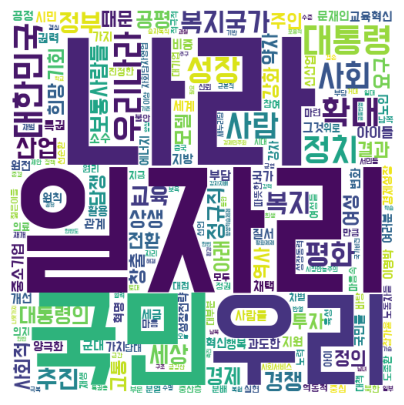

In [12]:
# wc.generate_from_frequencies()를 이용해 워드 클라우드를 만든 다음
# plt.imshow()를 이용해 출력

img_wordcloud = wc.generate_from_frequencies(dic_word)

import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5)) # 가로, 세로 크기 설정
plt.axis('off') # 테두리 선 없애기
plt.imshow(img_wordcloud)

## 워드 클라우드 모양 바꾸기

In [13]:
# mask 만들기
import PIL
icon = PIL.Image.open('Data/cloud.png')

import numpy as np
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)

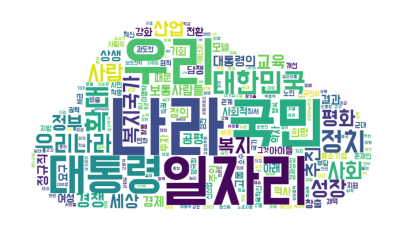

In [14]:
# 위의 코드에서 mask 매개변수 추가
wc = WordCloud(random_state = 1234,
               font_path = font,
               width = 500,
               height = 500,
               background_color = 'white',
               mask = img)

img_wordcloud = wc.generate_from_frequencies(dic_word)

import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5)) # 가로, 세로 크기 설정
plt.axis('off') # 테두리 선 없애기
plt.imshow(img_wordcloud)

## 워드 클라우드 색깔 바꾸기

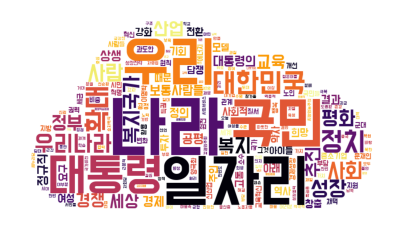

In [15]:
# 위의 코드에서 colormap 매개변수 추가
wc = WordCloud(random_state = 1234,
               font_path = font,
               width = 500,
               height = 500,
               background_color = 'white',
               mask = img,
               colormap = 'inferno')

img_wordcloud = wc.generate_from_frequencies(dic_word)

import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5)) # 가로, 세로 크기 설정
plt.axis('off') # 테두리 선 없애기
plt.imshow(img_wordcloud)

# 2. 기사 댓글 텍스트 마이닝

In [16]:
df = pd.read_csv('Data/news_comment_BTS.csv', encoding = 'UTF-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


## 불필요한 문자 제거

In [17]:
# 1절에서 다룬 moon은 str타입 변수이므로 re.sub() 사용
# 2절에서 분석하는 reply는 데이터 프레임에 담겨 있는 변수이므로 str.replace() 사용
df['reply'] = df['reply'].str.replace('[^가-힣]', ' ', regex = True)
df['reply'].head()

0                                    국보소년단            
1                                         아줌마가 들어도 좋더라
2    팩트체크  현재 빌보드           위  방탄소년단       위       ...
3              방탄소년단이 한국사람이라 너무 자랑스러워요    우리오래오래 함께하자 
4                  대단한      월드 클래스는 다르네   좋은 소식   응원해요
Name: reply, dtype: object

## 명사 추출하기

In [18]:
# Kkma(꼬꼬마) 형태소 분석기를 이용해 명사 추출
# 꼬꼬마 형태소 분석기는 띄어쓰기 오류가 있는 문장에서도 형태소를 잘 추출하는 장점
# 댓글처럼 정제되지 않은 텍스트를 분석할 때 적한

import konlpy
kkma = konlpy.tag.Kkma() # 대소문자 주의! Kkma

In [19]:
# 1절에서 다룬 moon은 문자 타입으로 된 하나의 변수
# 그러나 이번에 추출할 reply는 데이터 프레임에 들어 있는 변수이므로 kkma.nouns()에 바로 적용 불자
# apply()를 사용해 각 행의 값을 따로 처리

nouns = df['reply'].apply(kkma.nouns)
nouns

0                                        [국보, 국보소년단, 소년단]
1                                                   [아줌마]
2                   [팩트, 팩트체크, 체크, 보드, 위, 방탄, 방탄소년단, 소년단]
3              [방탄, 방탄소년단, 소년단, 한국, 한국사람, 사람, 자랑, 우리, 하자]
4                                       [월드, 클래스, 소식, 응원]
                              ...                        
1195                                                   []
1196                                      [우리, 탄, 자랑, 사랑]
1197                                              [애, 군대]
1198                                     [군, 군면제급, 면제, 급]
1199    [자랑, 축하, 김, 김남, 남, 김석진, 민, 민윤기, 윤기, 정, 정호석, 호석...
Name: reply, Length: 1200, dtype: object

## 단어 빈도표 만들기

In [20]:
# df.explode()를 이용해 한 행에 한 단어만 들어가도록
nouns = nouns.explode()
nouns

0          국보
0       국보소년단
0         소년단
1         아줌마
2          팩트
        ...  
1199      박지민
1199      김태형
1199        전
1199      전정국
1199       정국
Name: reply, Length: 9353, dtype: object

In [21]:
# 데이터 프레임 만들기
df_word = pd.DataFrame({'word' : nouns})
# 글자 수 변수 추가
df_word['count'] = df_word['word'].str.len()
# 두 글자 이상 단어만 남기기
df_word = df_word.query('count > 1')
df_word.head()

,word,count
0,국보,2.0
0,국보소년단,5.0
0,소년단,3.0
1,아줌마,3.0
2,팩트,2.0


In [22]:
# 빈도표 만들기
df_word = df_word.groupby('word', as_index = False)\
            .agg(n = ('word', 'count'))\
            .sort_values('n', ascending = False)
df_word.head()

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136


## 워드 클라우드 만들기

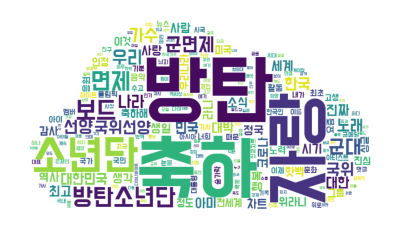

In [23]:
dic_word = df_word.set_index('word').to_dict()['n']

# 위의 코드에서 colormap 매개변수 추가
wc = WordCloud(random_state = 1234,
               font_path = font,
               width = 500,
               height = 500,
               background_color = 'white',
               mask = img)

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (5, 5)) # 가로, 세로 크기 설정
plt.axis('off') # 테두리 선 없애기
plt.imshow(img_wordcloud)